# Introduction to Python

## Lists

This is just a quick highlight of some points from the notebook on [lists in Python](python_lists.ipynb).  

We can use the `range` function to produce lists of integers for us.  For example, to create a list of the integers from 1 to 10:

In [2]:
test_list = list( range(1,10+1) )

print(test_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


You should try to edit and modify the function to get a better understanding of how it works.  Also, if you hover over the function with the cursor, the Jupyter notebook will provide some documentation for the function.



Based on this, we can create a little program to sum the integers from 1 to $N$, raised to a power $m$:

In [3]:
N = 50   # this is the final integer
m = 1    # this is the power to raise each integer

N_list = list(range(1,N+1))

total = 0
for n in N_list:
  total = total + n**m
print(N, m, total)

50 1 1275


## Loops


One important concept we can exploit is the if we want to repeat a calculation multiple times, we just need to put it in a loop.  Below, we put the code we wrote above into a loop to repeat the calculation for different values of $m$:

In [6]:
N = 50

for m in range(5):

  N_list = list(range(1,N+1))

  total = 0
  for n in N_list:
    total = total + n**m
  print(m, total)



0 50
1 1275
2 42925
3 1625625
4 65666665


## Functions

Rather than cutting and pasting the entire code, we can define a function that performs the calculation.  For more information on functions, see the [notebook](python_functions.ipynb) on Myplace.

Below, we define a function called `myfunction` that performs the above calculation.  Note that the values of the variables $N$ and $m$ appear as arguments to the function, and the function returns the result.  To perform the calculation, we just call the function, with the appropriate arguments, and put its output into a variable.


In [7]:
def myfunction(N, m):
  N_list = list(range(1,N+1))
  total = 0
  for n in N_list:
    total = total + n**m
  return total


y = myfunction(100, 1)
print(y)


N = 50

for m in range(5):
  total = myfunction(N, m)
  print(m, total)

5050
0 50
1 1275
2 42925
3 1625625
4 65666665


## Example: Heat capacities

To provide a practical example of how to use what we have learned about lists, looping, and functions, let's try to plot the temperature dependent heat capacity of methane.  We can grab the necessary data from the [NIST Chemistry WebBook](https://webbook.nist.gov/cgi/cbook.cgi?ID=C74828&Mask=1).

The correlation for the heat capacity is given by the Shomate equation
$$
C_p^\circ = A + Bt + Ct^2 + Dt^3 + E/t^2
$$
where $C_p$ is the ideal gas heat capacity in units of ${\rm J\,mol^{-1}\,K^{-1}}$, $t=T/1000$, $T$ is the absolute temperature in kelvin, and $A$, $B$, $C$, $D$, and $E$ are parameters that depend on the particular compound.  We can extract these parameters from the table on the webpage.

With this, we can calculate the heat capacity of methane.

In [10]:
A=	-0.703
B=	108.477
C=	-42.522
D=	5.86279
E=	0.67857
F=	-76.844
G=	158.716
H=	-74.873

T = 400
t = T/1000
Cp = A + B*t + C*t**2 + D*t**3 + E/t**2
print(T, Cp)

400 40.50056106


By putting this in a loop, we can generate a plot of the heat capacity of methane with temperature.  For an introduction to plotting, see the relevant [notebook](python_plotting.ipynb).

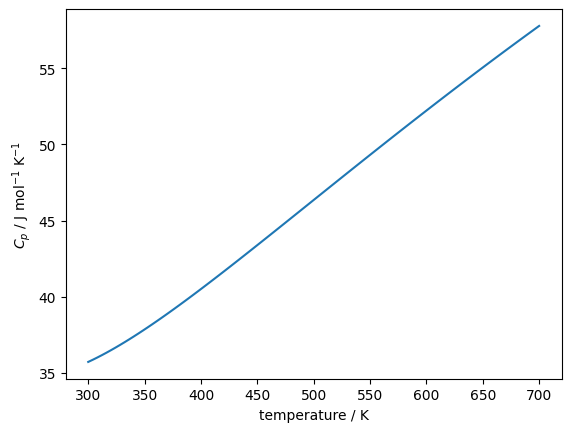

In [12]:
A=	-0.703
B=	108.477
C=	-42.522
D=	5.86279
E=	0.67857
F=	-76.844
G=	158.716
H=	-74.873


import numpy as np
import pylab as plt


T_list = np.linspace(300, 700, 100)
Cp_list = []
for T in T_list:
  t = T/1000
  Cp = A + B*t + C*t**2 + D*t**3 + E/t**2
  Cp_list.append(Cp)

plt.plot(T_list, Cp_list)
plt.xlabel('temperature / K')
plt.ylabel('$C_p$ / J mol$^{-1}$ K$^{-1}$')
plt.show()

Finally, we can make the code look cleaner if we put the heat capacity calculation in a function, which we will call `get_Cp`.  The function takes two arguments: temperature and a list of parameters, which are in the variable `param`.  By doing this, we can easily calculate the heat capacity for any compound using the same function, as long as we pass it the appropriate parameters.  

From the NIST Chemistry WebBook, we get the parameters of the Shomate equation for the additional compounds oxygen, nitrogen, carbon dioxide, and water.  The code below plots the heat capacities for all these compounds.

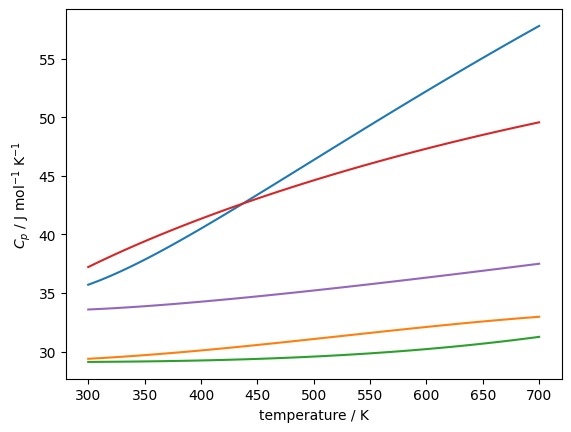

In [16]:


methane = [-0.703,108.477,-42.522,5.86279,0.67857,-76.844,158.716,-74.873]
oxygen = [31.3223,-20.235,57.8664,-36.506,-0.0074,-8.9035,246.795,0]
nitrogen = [28.98641,1.853978,-9.647459,16.63537,0.000117,-8.671914,226.4168,0]
CO2 = [24.99735,55.18696,-33.69137,7.948387,-0.136638,-403.6075,228.2431,-393.5224]
water = [30.092,6.832514,6.793435,-2.53448,0.082139,-250.881,223.3967,-241.8264]

def get_Cp(T, param):
  t = T/1000
  A, B, C, D, E, F, G, H = param
  Cp = A + B*t + C*t**2 + D*t**3 + E/t**2
  return Cp


import numpy as np
import pylab as plt


for molecule in [methane, oxygen, nitrogen, CO2, water]:
  T_list = np.linspace(300, 700, 100)
  Cp_list = []
  for T in T_list:
    Cp = get_Cp(T, molecule)
    Cp_list.append(Cp)
  plt.plot(T_list, Cp_list)
  #print(T, Cp)

#print(Cp_list)


plt.xlabel('temperature / K')
plt.ylabel('$C_p$ / J mol$^{-1}$ K$^{-1}$')
plt.show()
